In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

### Heatmap youtube
https://www.youtube.com/watch?v=0U9cs2V-Mqc

A heat map is just a visual way to display a table of numbers

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


In [101]:
def table_flavor(group):
    return (
        indian_food
        .groupby(group)
        .flavor_profile
        .value_counts()
        .unstack() # get out of the multi-level index
        .fillna(0) # replace NaN with zeros
       ) 

In [116]:
def table_course(group):
    return (
        indian_food
        .groupby(group)
        .course
        .value_counts()
        .unstack() # get out of the multi-level index
        .fillna(0) # replace NaN with zeros
       ) 

In [122]:
def table_state(group):
    return (
        indian_food
        .groupby(group)
        .state
        .value_counts()
        .unstack() # get out of the multi-level index
        .fillna(0) # replace NaN with zeros
       ) 

In [125]:
def table_region(group):
    return (
        indian_food
        .groupby(group)
        .region
        .value_counts()
        .unstack() # get out of the multi-level index
        .fillna(0) # replace NaN with zeros
       ) 

## Flavor_Diet

In [106]:
table_flavor('diet')

flavor_profile,bitter,sour,spicy,sweet
diet,,,,
non vegetarian,0.0,0.0,26.0,0.0
vegetarian,4.0,1.0,107.0,88.0


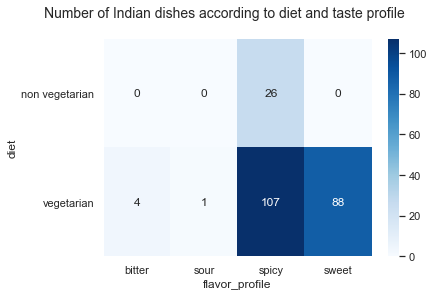

In [112]:
def heat(df, title):
    sns.heatmap(data=df, 
            cmap='Blues', 
            annot=True,
            fmt='.0f')

    plt.title(title, y=1.07, x=0.45, fontsize=14)
    plt.yticks(rotation=360)
    plt.show()
    
heat(table_flavor('diet'), "Number of Indian dishes according to diet and taste profile")

In [33]:
non_veg=indian_food[indian_food["diet"] == 'non vegetarian'] 
non_veg.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
64,Maach Jhol,"fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10.0,40.0,spicy,main course,Assam,North East,6
65,Pork Bharta,"boiled pork, onions, chillies, ginger and garlic",non vegetarian,NaN,NaN,spicy,main course,Tripura,North East,4


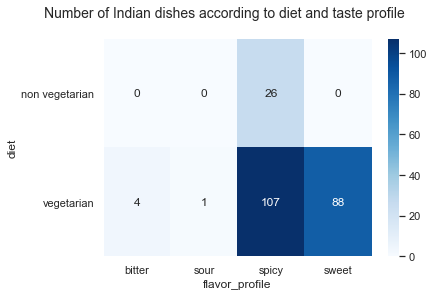

In [110]:
sns.heatmap(data=flavor_diet, 
            cmap='Blues', 
            annot=True,
            fmt='.0f')

plt.title("Number of Indian dishes according to diet and taste profile", y=1.07, x=0.45, fontsize=14)
plt.yticks(rotation=360)
plt.show()

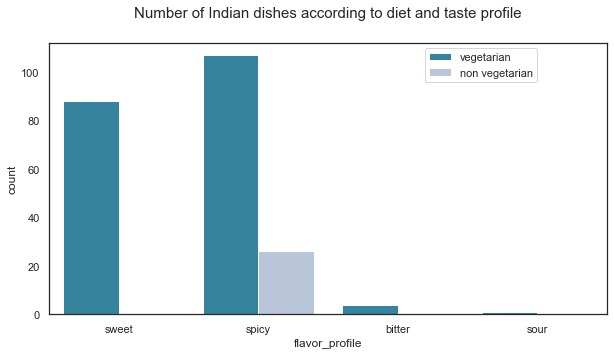

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x="flavor_profile", hue='diet', data=indian_food, palette='PuBuGn_r')

plt.legend(bbox_to_anchor=(0.884, 1))
plt.title("Number of Indian dishes according to diet and taste profile", y=1.07, fontsize=15)
plt.show()

## Course_Diet

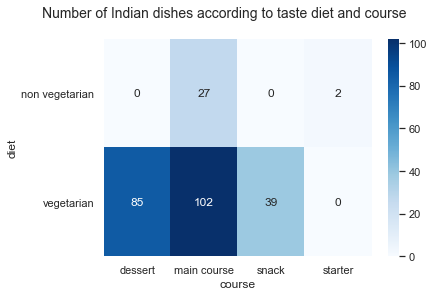

In [121]:
heat(table_course('diet'), "Number of Indian dishes according to taste diet and course")

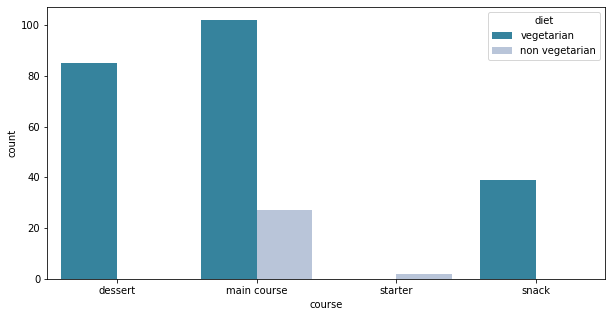

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x="course", hue='diet', data=indian_food, palette='PuBuGn_r')
plt.show()

In [52]:
#create DataFrame
course_diet = (
    indian_food
    .groupby('diet')
    .course
    .value_counts()
    .unstack() # get out of the multi-level index
    .fillna(0) # replace NaN with zeros
) 
course_diet= course_diet.T
course_diet

diet,non vegetarian,vegetarian
course,,
dessert,0.0,85.0
main course,27.0,102.0
snack,0.0,39.0
starter,2.0,0.0


In [54]:
course_diet=course_diet.reset_index()
course_diet

diet,course,non vegetarian,vegetarian
0,dessert,0.0,85.0
1,main course,27.0,102.0
2,snack,0.0,39.0
3,starter,2.0,0.0


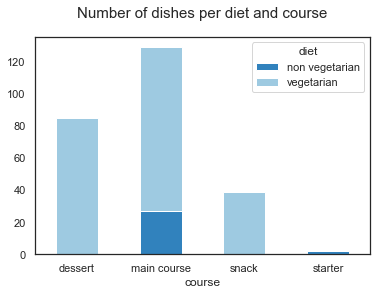

In [76]:
#Create the Stacked Bar Chart
sns.set(style='white')

course_diet.set_index('course').plot(kind='bar', 
                                     stacked=True, 
                                     color=['#3182bd', '#9ecae1'])

plt.title('Number of dishes per diet and course', y=1.06, fontsize=15)
plt.xticks(rotation=360)
plt.show()

## Course_Flavor

In [105]:
table_flavor('course')

flavor_profile,bitter,sour,spicy,sweet
course,,,,
dessert,0.0,0.0,0.0,85.0
main course,3.0,1.0,96.0,3.0
snack,1.0,0.0,35.0,0.0
starter,0.0,0.0,2.0,0.0


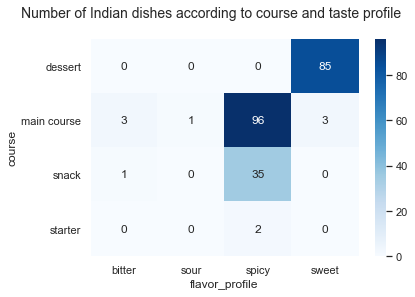

In [115]:
heat(table_flavor('course'), "Number of Indian dishes according to course and taste profile")

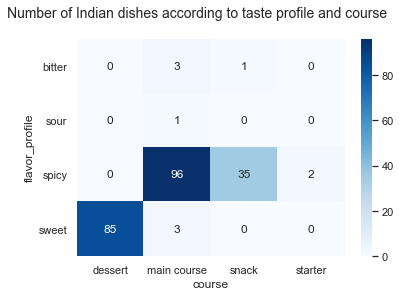

In [120]:
heat(table_course('flavor_profile'), "Number of Indian dishes according to taste profile and course")

## State_Diet

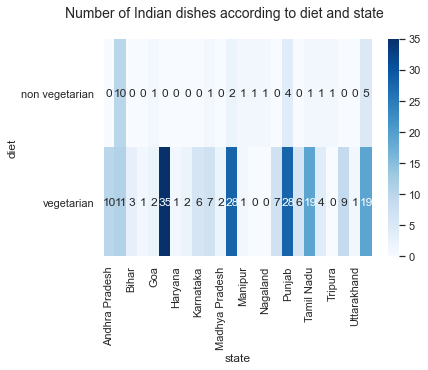

In [124]:
heat(table_state('diet'), "Number of Indian dishes according to diet and state")

## State_Flavor

In [104]:
table_flavor('state')

flavor_profile,bitter,sour,spicy,sweet
state,,,,
Andhra Pradesh,0.0,0.0,2.0,8.0
Assam,0.0,0.0,11.0,6.0
Bihar,0.0,0.0,2.0,1.0
Chhattisgarh,0.0,0.0,1.0,0.0
Goa,0.0,0.0,1.0,2.0
Gujarat,2.0,1.0,23.0,6.0
Haryana,0.0,0.0,1.0,0.0
Jammu & Kashmir,0.0,0.0,1.0,1.0
Karnataka,0.0,0.0,2.0,3.0


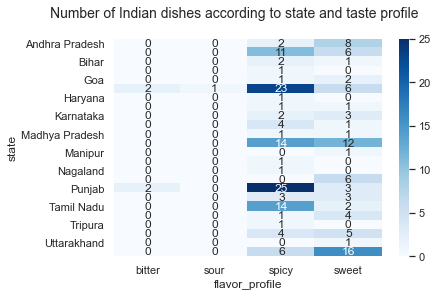

In [114]:
heat(table_flavor('state'), "Number of Indian dishes according to state and taste profile")

## State_Course

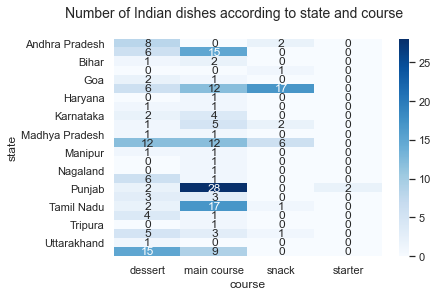

In [118]:
heat(table_course('state'), "Number of Indian dishes according to state and course")

## Region_Diet

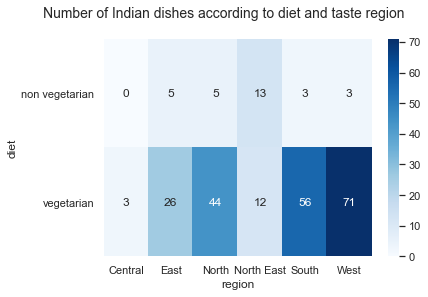

In [127]:
heat(table_region('diet'), "Number of Indian dishes according to diet and taste region")

## Region_Flavor

In [103]:
table_flavor('region')

flavor_profile,bitter,sour,spicy,sweet
region,,,,
Central,0.0,0.0,2.0,1.0
East,0.0,0.0,6.0,22.0
North,2.0,0.0,35.0,10.0
North East,0.0,0.0,13.0,7.0
South,0.0,0.0,30.0,19.0
West,2.0,1.0,41.0,23.0


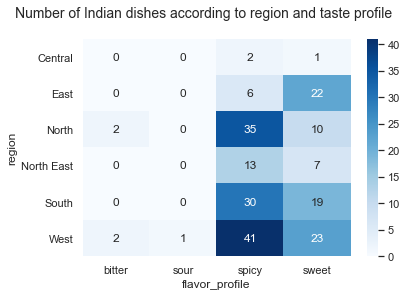

In [113]:
heat(table_flavor('region'), "Number of Indian dishes according to region and taste profile")

## Region_Course

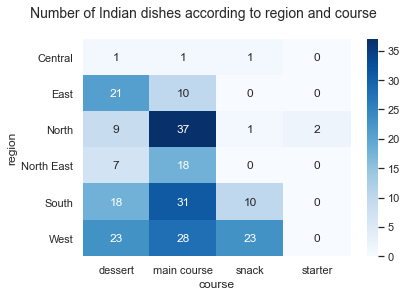

In [117]:
heat(table_course('region'), "Number of Indian dishes according to region and course")

## Region_State

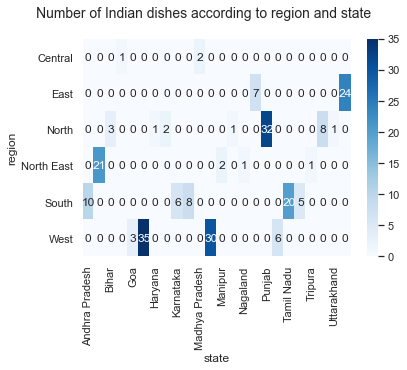

In [123]:
heat(table_state('region'), "Number of Indian dishes according to region and state")

In [137]:
table_state('region')

state,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
region,,,,,,,,,,,,,,,,,,,,,
Central,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
North,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,32.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0
North East,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
South,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,...,0.0,0.0,0.0,0.0,20.0,5.0,0.0,0.0,0.0,0.0
West,0.0,0.0,0.0,0.0,3.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


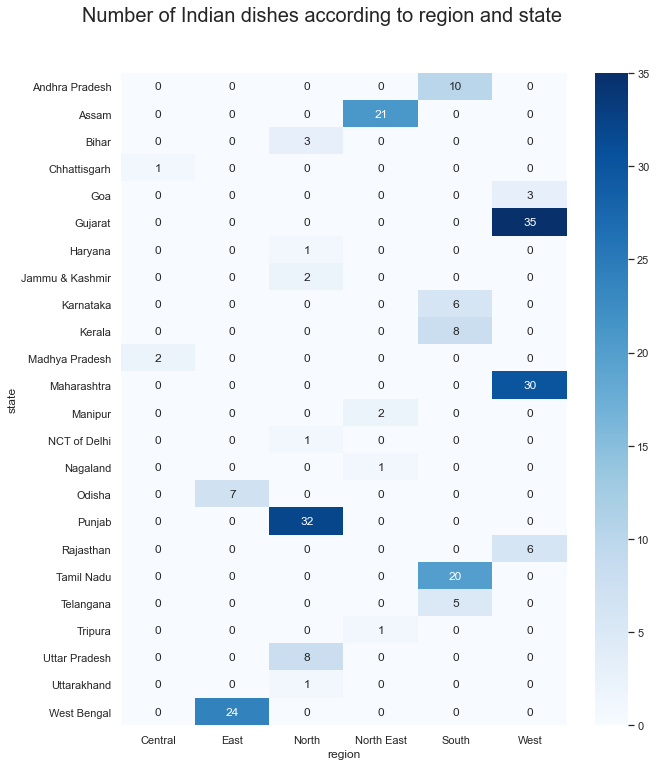

In [143]:
plt.figure(figsize=(10,12))
sns.heatmap(data=table_state('region').T, 
            cmap='Blues', 
            annot=True,
            fmt='.0f')

plt.title("Number of Indian dishes according to region and state", y=1.07, x=0.45, fontsize=20)
plt.yticks(rotation=360)
plt.show()

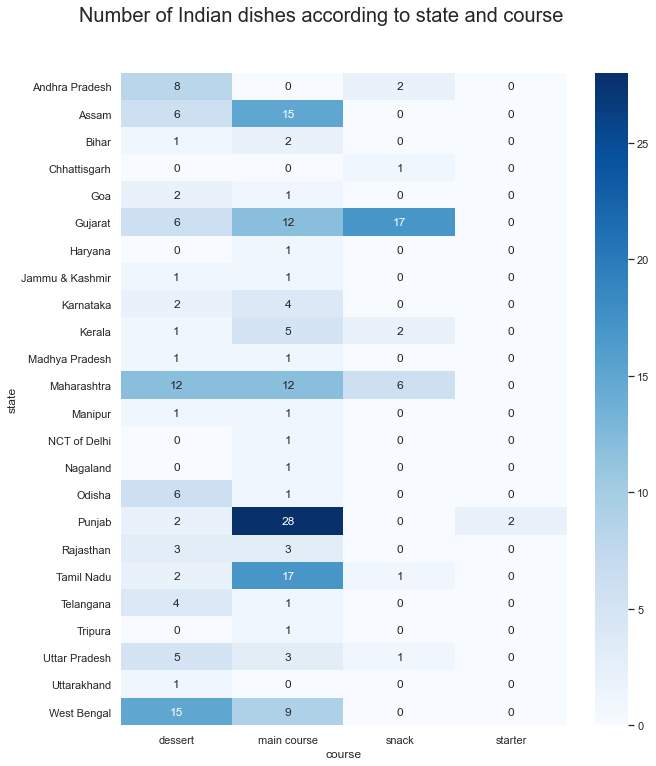

In [146]:
plt.figure(figsize=(10,12))
sns.heatmap(data=table_course('state'), 
            cmap='Blues', 
            annot=True,
            fmt='.0f')

plt.title("Number of Indian dishes according to state and course", y=1.07, x=0.45, fontsize=20)
plt.yticks(rotation=360)
plt.show()